In [1]:
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from nltk import ngrams
from nltk.util import pr
import re
from collections import Counter

# Вхідні дані

In [2]:
# Грами української мови
grams = ["а","б","в","г","д","е","є","ж","з","и","і","ї","й","к","л","м","н","о","п","р","с","т","у","ф","х","ц","ч","ш","щ","ь", "ю", "я"]
# Частота грам української мови
grams_frequency = { "а": 0.0807, "б": 0.0177, "в": 0.0535, "г": 0.0155, "д": 0.0338, "е": 0.0495, "є": 0.0061,"ж": 0.0093, "з": 0.0232, "и": 0.0626, "і": 0.0575, "ї": 0.0065, "й": 0.0138, "к": 0.0354, "л": 0.0369, "м": 0.0303, "н": 0.0681, "о": 0.0942, "п": 0.0290, "р": 0.0448, "с": 0.0424, "т": 0.0535, "у": 0.0336, "ф": 0.0028, "х": 0.0119, "ц": 0.0083, "ч": 0.0141, "ш": 0.0076, "щ": 0.0056, "ь": 0.0177, "ю": 0.0093, "я": 0.0248}

# Твори Любко Дереша
myrotvorets = '/content/drive/MyDrive/CL/liubko_deresh/Myrotvorets.txt'
pokloninnya_yaschirci = '/content/drive/MyDrive/CL/liubko_deresh/Pokloninnya_yaschirci.txt'
spustoshennya = '/content/drive/MyDrive/CL/liubko_deresh/Spustoshennya.txt'

liubko_deresh = [myrotvorets, pokloninnya_yaschirci, spustoshennya]

# Твори Сергія Жадана
internat = '/content/drive/MyDrive/CL/sergiy_zhadan/Internat.txt'
mesopotamia = '/content/drive/MyDrive/CL/sergiy_zhadan/Mesopotamiia.txt'
voroshilovgrad = '/content/drive/MyDrive/CL/sergiy_zhadan/Vohnepalni_y_nozhevi_test.txt'

sergiy_zhadan = [internat, mesopotamia, voroshilovgrad]

# Твори Софії Андрухович
atlant_rozpraviv_plechi = '/content/drive/MyDrive/CL/sofia_andruchovych/Atlant_rozpraviv_plechi.txt'
lito_mileny = '/content/drive/MyDrive/CL/sofia_andruchovych/Lito_mileny.txt'
zhinki_yihnih_cholovikiv = '/content/drive/MyDrive/CL/sofia_andruchovych/Zhinki_yihnih_cholovikiv.txt'

sofia_andruchovych = [atlant_rozpraviv_plechi, lito_mileny, zhinki_yihnih_cholovikiv]

# Твори для встановлення авторства
trohi_pitmy = '/content/drive/MyDrive/CL/liubko_deresh/Trohi_pitmy_test.txt' # Любко Дереш
vohnepalni_y_nozhevi = '/content/drive/MyDrive/CL/sergiy_zhadan/Vohnepalni_y_nozhevi_test.txt' # Сергій Жадан
stari_lyudy = '/content/drive/MyDrive/CL/sofia_andruchovych/Stari_lyudy_test.txt' # Софія Андрухович

author_detection = [trohi_pitmy, vohnepalni_y_nozhevi, stari_lyudy]

# Опрацювання тексту

In [6]:
def get_text_from_file(filename):
  lines = []
  with open(filename) as f:
    lines = f.readlines()
  result = ''
  for line in lines:
    line = re.sub('\r?\n', '', line)
    result += line
  result = re.sub(r'[^\w\s+]','', result).lower()
  return result

# get_text_from_file(trohi_pitmy)

def non_space(symbol):
  if symbol != ' ':
    return True
  else:
    return False

def symbols_count(text):
  count = 0
  for symbol in text:
    if (symbol in grams):
      count += 1
  return count

# symbols_count(get_text_from_file(trohi_pitmy))

Частота грам та біграм

In [53]:
def gram_frequency_in_text(text):
  grams_frequency_dictionary = Counter(text)
  result = {}
  for gram in grams:
    if (gram in grams_frequency_dictionary):
      result[gram] = grams_frequency_dictionary[gram]
    else: 
      result[gram] = 0 
  values = result.values()
  total = sum(values)
  for key, value in result.items():
    result[key] = result[key] / total
  return result

# get_gram_frequency_in_text(get_text_from_file(trohi_pitmy))

def author_gram_frequency(author_texts):
  author_frequency_dictionary = {}
  for i in range(len(author_texts)):
    text = get_text_from_file(author_texts[i])
    result = gram_frequency_in_text(text)
    for key, value in result.items():
      if (key in author_frequency_dictionary):
        author_frequency_dictionary[key] += value
      else:
        author_frequency_dictionary[key] = value
  for key, value in author_frequency_dictionary.items():
    author_frequency_dictionary[key] = value / len(author_texts)
  return result

# liubko_deresh
# author_gram_frequency(liubko_deresh)

def bigram_frequency_in_text(text):
  bigrams = ngrams(text, 2)
  result = {}
  for gram in bigrams:
        if (gram in result and non_space(gram[0]) and non_space(gram[1])):
          result[gram] += 1
        elif (non_space(gram[0]) and non_space(gram[1])):
            result[gram] = 1
  values = result.values()
  total = sum(values)
  for key, value in result.items():
    result[key] = result[key] / total
  return result

# bigram_frequency_in_text(get_text_from_file(trohi_pitmy))

def author_bigram_frequency(author_texts):
  author_frequency_dictionary = {}  
  for i in range(len(author_texts)):
    text = get_text_from_file(author_texts[i])
    bigrams = bigram_frequency_in_text(text)
    for key, value in bigrams.items():
      if (key in author_frequency_dictionary):
        author_frequency_dictionary[key] += value        
      else:
        author_frequency_dictionary[key] = value
    for key, value in author_frequency_dictionary.items():
      author_frequency_dictionary[key] = value / len(author_texts)
  return author_frequency_dictionary

def histogram(dictionary, label):
  plt.title(label=label)
  plt.bar(dictionary.keys(), dictionary.values(), color='c', label = label)
  plt.show()

def compare_frequency_histogram(dictionary, label):
  author_frequency = list(dictionary.values())
  ukrainian_frequency = list(grams_frequency.values())
  x = list(dictionary.keys())
  plt.bar(x, author_frequency, color='b', label = "автор")
  plt.bar(x, ukrainian_frequency, color='y', label = "українська", alpha=0.8)
  plt.title(label=label)
  plt.show()

def heatchart(dictionary, label):
  check = []
  for first_letter in grams:
        values = []
        for second_letter in grams:
              key = (first_letter, second_letter)
              if (key in dictionary):
                value = float(dictionary[key])
                values.append(value);
              else:
                values.append(0.0); 
        check.append(values)
  arrayOut = np.array(check);
  fig, ax = plt.subplots()
  im = ax.imshow(arrayOut)
  ax.set_xticks(np.arange(len(grams)))
  ax.set_yticks(np.arange(len(grams)))
  ax.set_xticklabels(grams)
  ax.set_yticklabels(grams)
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
  fig.tight_layout()
  plt.set_cmap('hot_r')
  plt.title(label=label)
  plt.show()

def author_comparison_heatchart(first_texts, second_texts, label):
      result = {}
      first_bigram_frequency = author_bigram_frequency(first_texts)
      second_bigram_frequency = author_bigram_frequency(second_texts)
      for key, value in first_bigram_frequency.items():
            if key in second_bigram_frequency:
                  result[key] = abs(first_bigram_frequency[key] - second_bigram_frequency[key])
      heatchart(result, label)

Результати дослідження частот

In [8]:
print("Кількість символів українського алфавіту в творах авторів")
print("_________________________________________________________")
print("Любко Дереш")
print("Миротворець: {}".format(symbols_count(get_text_from_file(myrotvorets))))
print("Поклоніння ящірці: {}".format(symbols_count(get_text_from_file(pokloninnya_yaschirci))))
print("Спустошення: {}".format(symbols_count(get_text_from_file(spustoshennya))))
print("_________________________________________________________")
print("Сергій Жадан")
print("Інтернат: {}".format(symbols_count(get_text_from_file(internat))))
print("Месопотамія: {}".format(symbols_count(get_text_from_file(mesopotamia))))
print("Ворошиловград: {}".format(symbols_count(get_text_from_file(voroshilovgrad))))
print("_________________________________________________________")
print("Софія Андрухович")
print("Атлант розправив плечі: {}".format(symbols_count(get_text_from_file(atlant_rozpraviv_plechi))))
print("Літо Мілени: {}".format(symbols_count(get_text_from_file(lito_mileny))))
print("Жінки їхніх чоловіків: {}".format(symbols_count(get_text_from_file(zhinki_yihnih_cholovikiv))))

Кількість символів українського алфавіту в творах авторів
_________________________________________________________
Любко Дереш
Миротворець: 206857
Поклоніння ящірці: 176795
Спустошення: 568141
_________________________________________________________
Сергій Жадан
Інтернат: 361037
Месопотамія: 373582
Ворошиловград: 87399
_________________________________________________________
Софія Андрухович
Атлант розправив плечі: 743360
Літо Мілени: 98216
Жінки їхніх чоловіків: 165635


In [10]:
print("Частота символів українського алфавіту в творах авторів")
print("_________________________________________________________")
print("Любко Дереш")
print("Миротворець: {}".format(gram_frequency_in_text(get_text_from_file(myrotvorets))))
print("Поклоніння ящірці: {}".format(gram_frequency_in_text(get_text_from_file(pokloninnya_yaschirci))))
print("Спустошення: {}".format(gram_frequency_in_text(get_text_from_file(spustoshennya))))
print("_________________________________________________________")
print("Сергій Жадан")
print("Інтернат: {}".format(gram_frequency_in_text(get_text_from_file(internat))))
print("Месопотамія: {}".format(gram_frequency_in_text(get_text_from_file(mesopotamia))))
print("Ворошиловград: {}".format(gram_frequency_in_text(get_text_from_file(voroshilovgrad))))
print("_________________________________________________________")
print("Софія Андрухович")
print("Атлант розправив плечі: {}".format(gram_frequency_in_text(get_text_from_file(atlant_rozpraviv_plechi))))
print("Літо Мілени: {}".format(gram_frequency_in_text(get_text_from_file(lito_mileny))))
print("Жінки їхніх чоловіків: {}".format(gram_frequency_in_text(get_text_from_file(zhinki_yihnih_cholovikiv))))

Частота символів українського алфавіту в творах авторів
_________________________________________________________
Любко Дереш
Миротворець: {'а': 0.08374867662201424, 'б': 0.01806562021106368, 'в': 0.06242476686793292, 'г': 0.016895729900365954, 'д': 0.0319447734425231, 'е': 0.04849727106165128, 'є': 0.003751383806204286, 'ж': 0.008788680102679629, 'з': 0.02421479572845009, 'и': 0.06254562330498847, 'і': 0.05731495670922425, 'ї': 0.0057672691762908675, 'й': 0.013540755207703873, 'к': 0.03439090772852744, 'л': 0.03528524536273851, 'м': 0.030944082143703137, 'н': 0.06524797323755058, 'о': 0.09639992845298927, 'п': 0.027216869624909962, 'р': 0.04213538821504711, 'с': 0.04593994885355584, 'т': 0.0505856702939712, 'у': 0.03583635071571182, 'ф': 0.002431631513557675, 'х': 0.0094413048627796, 'ц': 0.007551110187230792, 'ч': 0.014309402147377174, 'ш': 0.00900622168937962, 'щ': 0.006487573541141948, 'ь': 0.016069071870905987, 'ю': 0.00905456426420184, 'я': 0.02416645315362787}
Поклоніння ящірці:

*Любко Дереш*

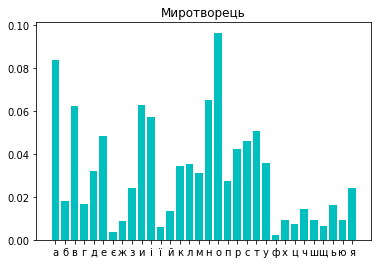

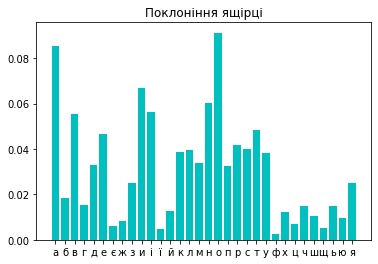

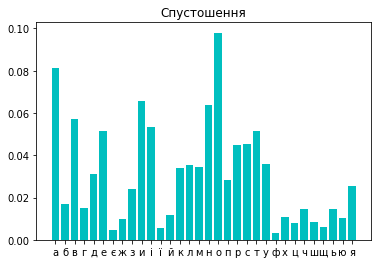

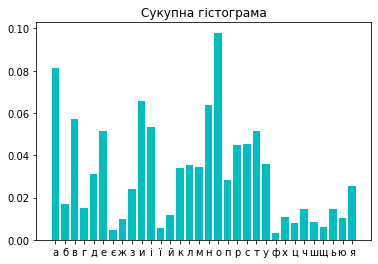

In [23]:
histogram(gram_frequency_in_text(get_text_from_file(myrotvorets)), "Миротворець")
histogram(gram_frequency_in_text(get_text_from_file(pokloninnya_yaschirci)), "Поклоніння ящірці")
histogram(gram_frequency_in_text(get_text_from_file(spustoshennya)), "Спустошення")
histogram(author_gram_frequency(liubko_deresh), "Сукупна гістограма")

*Сергій Жадан*

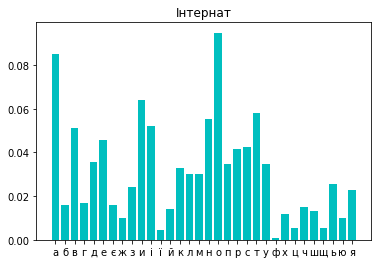

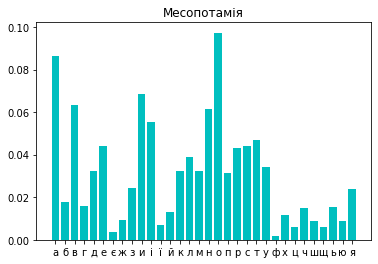

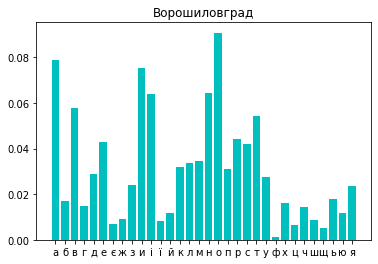

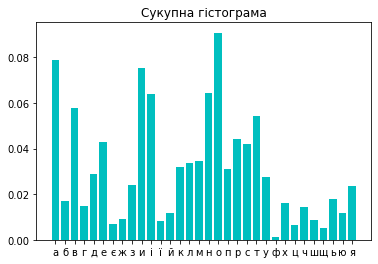

In [24]:
histogram(gram_frequency_in_text(get_text_from_file(internat)), "Інтернат")
histogram(gram_frequency_in_text(get_text_from_file(mesopotamia)), "Месопотамія")
histogram(gram_frequency_in_text(get_text_from_file(voroshilovgrad)), "Ворошиловград")
histogram(author_gram_frequency(sergiy_zhadan), "Сукупна гістограма")

*Софія Андрухович*

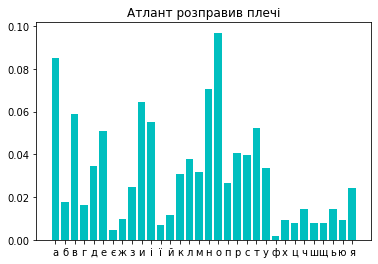

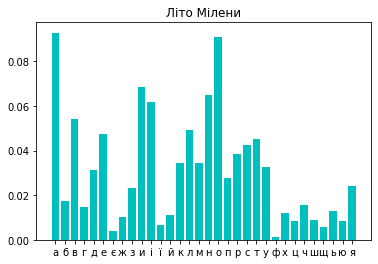

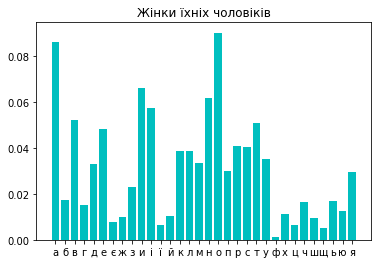

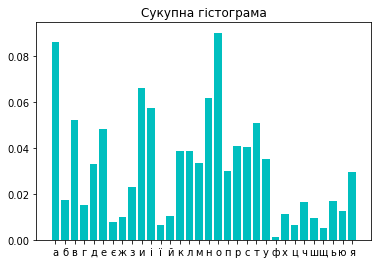

In [25]:
histogram(gram_frequency_in_text(get_text_from_file(atlant_rozpraviv_plechi)), "Атлант розправив плечі")
histogram(gram_frequency_in_text(get_text_from_file(lito_mileny)), "Літо Мілени")
histogram(gram_frequency_in_text(get_text_from_file(zhinki_yihnih_cholovikiv)), "Жінки їхніх чоловіків")
histogram(author_gram_frequency(sofia_andruchovych), "Сукупна гістограма")

Теплові діаграми біграм

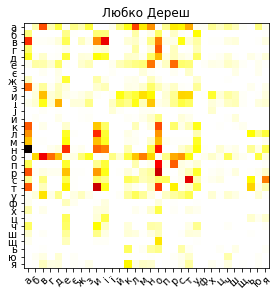

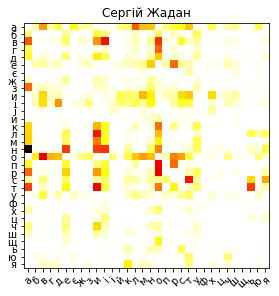

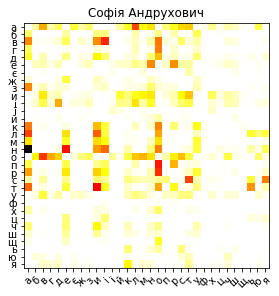

In [47]:
heatchart(author_bigram_frequency(liubko_deresh), 'Любко Дереш')
heatchart(author_bigram_frequency(sergiy_zhadan), 'Сергій Жадан')
heatchart(author_bigram_frequency(sofia_andruchovych), 'Софія Андрухович')

Гістограми різниці частот

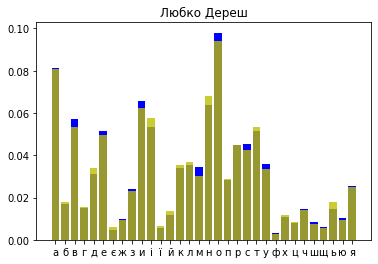

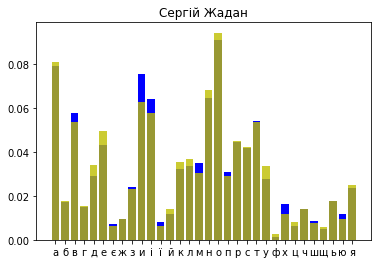

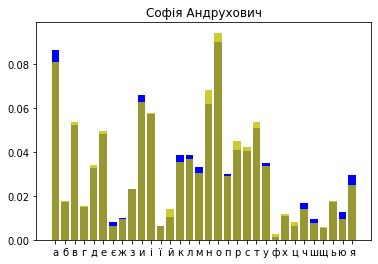

In [51]:
compare_frequency_histogram(author_gram_frequency(liubko_deresh), "Любко Дереш")
compare_frequency_histogram(author_gram_frequency(sergiy_zhadan), "Сергій Жадан")
compare_frequency_histogram(author_gram_frequency(sofia_andruchovych), "Софія Андрухович")

Теплові діаграми різниці біграм

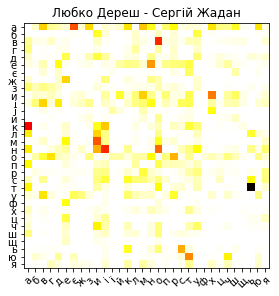

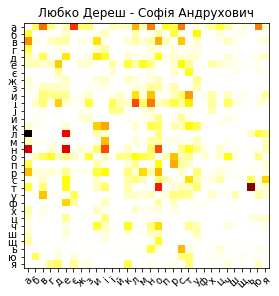

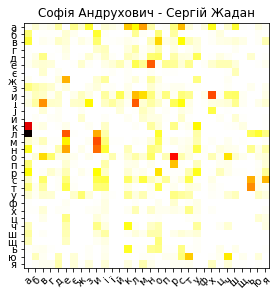

In [54]:
author_comparison_heatchart(liubko_deresh, sergiy_zhadan, "Любко Дереш - Сергій Жадан")
author_comparison_heatchart(liubko_deresh, sofia_andruchovych, "Любко Дереш - Софія Андрухович")
author_comparison_heatchart(sofia_andruchovych, sergiy_zhadan, "Софія Андрухович - Сергій Жадан")

# Встановлення авторства

In [57]:
def dictionary_difference(author_dictionary, text_dictionary):
  difference = 0
  for key, value in author_dictionary.items():
        if key in text_dictionary:
              difference += abs(value - text_dictionary[key])
        else: 
              difference += 0
  return difference

titles = ["Трохи пітьми", "Вогнепальні й ножеві", "Старі люди"]
authors = ["Любко Дереш", "Сергій Жадан", "Софія Андрухович"]

За допомогою грам

In [61]:
def gram_author_detection(text, correct_author):
  difference_deresh = dictionary_difference(author_gram_frequency(liubko_deresh), gram_frequency_in_text(text))
  difference_zhadan = dictionary_difference(author_gram_frequency(sergiy_zhadan), gram_frequency_in_text(text))
  difference_andruchovych = dictionary_difference(author_gram_frequency(sofia_andruchovych), gram_frequency_in_text(text))
  differences = [difference_deresh, difference_zhadan, difference_andruchovych]
  for i in range(len(differences)):
    print(authors[i] + ': ' + str(differences[i]) + '\n')
  author_index = np.argmin(differences)
  print("Ймовірний автор: " + authors[author_index])
  print("Справжній автор: " + correct_author)
  print("______________________________________________________")

def test_grams_recognition():
  for i in range(len(author_detection)):
    print(titles[i])
    text = get_text_from_file(author_detection[i])
    exp5000 = text[0:5000]
    exp10000 = text[0:10000]
    exp25000 = text[0:25000]
    exp50000 = text[0:50000]
    print("Розмір - 5000")
    gram_author_detection(exp5000, authors[i])
    print("Розмір - 10000")
    gram_author_detection(exp10000, authors[i])
    print("Розмір - 25000")
    gram_author_detection(exp25000, authors[i])
    print("Розмір - 50000")
    gram_author_detection(exp5000, authors[i])
    print("||||||||||||||||||||||||||||||||||||||||||||||||||||")

test_grams_recognition()

Трохи пітьми
Розмір - 5000
Любко Дереш: 0.10844761021155029

Сергій Жадан: 0.11025869861211232

Софія Андрухович: 0.06897261283814045

Ймовірний автор: Софія Андрухович
Справжній автор: Любко Дереш
______________________________________________________
Розмір - 10000
Любко Дереш: 0.0831302360120326

Сергій Жадан: 0.09714361782666105

Софія Андрухович: 0.05409799037908512

Ймовірний автор: Софія Андрухович
Справжній автор: Любко Дереш
______________________________________________________
Розмір - 25000
Любко Дереш: 0.07470932370421446

Сергій Жадан: 0.08773330276255867

Софія Андрухович: 0.044744741283548065

Ймовірний автор: Софія Андрухович
Справжній автор: Любко Дереш
______________________________________________________
Розмір - 50000
Любко Дереш: 0.10844761021155029

Сергій Жадан: 0.11025869861211232

Софія Андрухович: 0.06897261283814045

Ймовірний автор: Софія Андрухович
Справжній автор: Любко Дереш
______________________________________________________
||||||||||||||||||||||||

За допомогою біграм

In [62]:
def bigram_author_detection(text, correct_author):
  difference_deresh = dictionary_difference(author_bigram_frequency(liubko_deresh), bigram_frequency_in_text(text))
  difference_zhadan = dictionary_difference(author_bigram_frequency(sergiy_zhadan), bigram_frequency_in_text(text))
  difference_andruchovych = dictionary_difference(author_bigram_frequency(sofia_andruchovych), bigram_frequency_in_text(text))
  differences = [difference_deresh, difference_zhadan, difference_andruchovych]
  for i in range(len(differences)):
    print(authors[i] + ': ' + str(differences[i]) + '\n')
  author_index = np.argmin(differences)
  print("Ймовірний автор: " + authors[author_index])
  print("Справжній автор: " + correct_author)
  print("______________________________________________________")

def test_bigrams_recognition():
  for i in range(len(author_detection)):
    print(titles[i])
    text = get_text_from_file(author_detection[i])
    exp5000 = text[0:5000]
    exp10000 = text[0:10000]
    exp25000 = text[0:25000]
    exp50000 = text[0:50000]
    print("Розмір - 5000")
    bigram_author_detection(exp5000, authors[i])
    print("Розмір - 10000")
    bigram_author_detection(exp10000, authors[i])
    print("Розмір - 25000")
    bigram_author_detection(exp25000, authors[i])
    print("Розмір - 50000")
    bigram_author_detection(exp5000, authors[i])
    print("||||||||||||||||||||||||||||||||||||||||||||||||||||")

test_bigrams_recognition()

Трохи пітьми
Розмір - 5000
Любко Дереш: 0.5607894089832957

Сергій Жадан: 0.5544190245761055

Софія Андрухович: 0.5491606468265082

Ймовірний автор: Софія Андрухович
Справжній автор: Любко Дереш
______________________________________________________
Розмір - 10000
Любко Дереш: 0.5472454019335803

Сергій Жадан: 0.5417034215160794

Софія Андрухович: 0.5368654290366613

Ймовірний автор: Софія Андрухович
Справжній автор: Любко Дереш
______________________________________________________
Розмір - 25000
Любко Дереш: 0.5350908186345729

Сергій Жадан: 0.5256813909966305

Софія Андрухович: 0.524336328282212

Ймовірний автор: Софія Андрухович
Справжній автор: Любко Дереш
______________________________________________________
Розмір - 50000
Любко Дереш: 0.5607894089832957

Сергій Жадан: 0.5544190245761055

Софія Андрухович: 0.5491606468265082

Ймовірний автор: Софія Андрухович
Справжній автор: Любко Дереш
______________________________________________________
|||||||||||||||||||||||||||||||||||||